 # **Project Name**    - Yes Bank



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name -**  Prakhar Srivastava

# **Project Summary -**

The objective of this project is to analyze and predict the stock price trends of **Yes Bank** using historical stock market data. The primary goal is to gain insights from the data through visualization and exploratory data analysis (EDA), followed by building a machine learning model that can accurately forecast the closing prices of the stock.

- The dataset includes variables such as `Date`, `Open`, `High`, `Low`, and `Close` prices, which will be explored to identify patterns and relationships. Further steps will include handling missing values, outlier detection, feature selection, and applying suitable machine learning algorithms for prediction.

- The project will use Python along with libraries such as **Pandas**, **Matplotlib**, and **Scikit-learn** for data manipulation, visualization, and modeling.

- This end-to-end approach aims to not only build a strong predictive model but also to understand the underlying structure of financial data for better decision-making.


# **GitHub Link -**

<a href="https://github.com/TechNinja-dev/Stock-Price-Forcasting-for-Yes-Bank.git">https://github.com/TechNinja-dev/Stock-Price-Forcasting-for-Yes-Bank.git</a>

# **Problem Statement**


The aim of this project is to develop a reliable machine learning model that can accurately predict the **closing stock price of Yes Bank** based on historical stock data. 

#### **Define Your Business Objective?**

The primary business objective of this project is to build a machine learning model that **predicts the future closing price of Yes Bank's stock** using historical data. 

This model aims to support:

- **Investors and Traders** in making data-driven buy/sell decisions.
- **Risk Analysts** in identifying potential volatility and planning mitigation strategies.
- **Financial Institutions** in enhancing forecasting tools for stock market analytics.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np

### Dataset Loading

In [2]:
# Load Dataset
df=pd.read_csv("data_YesBank_StockPrices.csv")

### Dataset First View

In [3]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [4]:
#Dataset Rows & Columns count
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])
print("Column Names:", df.columns.tolist())

Number of Rows: 185
Number of Columns: 5
Column Names: ['Date', 'Open', 'High', 'Low', 'Close']


### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
int(df.duplicated().sum())

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

### 📊 Lets Explore What Did We Learn About the Dataset?

The dataset contains historical stock prices of Yes Bank, with 185 rows and 5 columns.

Each row represents stock data for a specific date, and the columns include:

- **Date:** The date of the record (object type; can be converted to datetime)

- **Open:** Stock price at market open

- **High:** Highest price of the day
 
- **Low:** Lowest price of the day
 
- **Close:** Stock price at market close

✅ All columns have complete data — no missing or null values were found.

✅ There are no duplicate rows, indicating the dataset is clean.

🧮 The numeric columns (Open, High, Low, Close) are of type float64, suitable for further statistical analysis and modeling.

## ***2. Understanding Your Variables***

In [8]:
# Dataset Columns
df.columns.tolist()

['Date', 'Open', 'High', 'Low', 'Close']

In [9]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

Below is a brief description of each variable in the dataset:

- **Date**: The trading date for each record. While it is not used directly in prediction models, it is important for time-based analysis, trend visualization, and for creating additional time-related features (e.g., day of the week, month).
  
- **Open**: The price at which Yes Bank's stock opened for trading on a given day.

- **High**: The highest price reached by the stock during the trading day.

- **Low**: The lowest price reached by the stock during the trading day.

- **Close**: The final price of the stock at market close. This is often used as the **target variable** for stock price prediction tasks.

> All price-related columns (`Open`, `High`, `Low`, `Close`) are continuous numerical variables and are essential for trend and pattern analysis.


### Check Unique Values for each variable.

In [10]:
# Check Unique Values for each variable.
df.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [11]:

df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')

df = df.drop_duplicates()

df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df['Daily_Return'] = df['Close'].pct_change()
df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod()

columns_order = ['Date', 'Open', 'High', 'Low','Month','Year', 'Daily_Return', 'Cumulative_Return', 'Close']
df=df[columns_order]

print("Missing values:\n", df.isna().sum())
print("\nData types after conversion:\n", df.dtypes)

df = df.reset_index(drop=True)
df.head()


Missing values:
 Date                 0
Open                 0
High                 0
Low                  0
Month                0
Year                 0
Daily_Return         1
Cumulative_Return    1
Close                0
dtype: int64

Data types after conversion:
 Date                 datetime64[ns]
Open                        float64
High                        float64
Low                         float64
Month                         int32
Year                          int32
Daily_Return                float64
Cumulative_Return           float64
Close                       float64
dtype: object


,Date,Open,High,Low,Month,Year,Daily_Return,Cumulative_Return,Close
0,2005-07-01,13.00,14.00,11.25,7,2005,NaN,NaN,12.46
1,2005-08-01,12.58,14.88,12.55,8,2005,0.077047,1.077047,13.42
2,2005-09-01,13.48,14.87,12.27,9,2005,-0.008942,1.067416,13.30
3,2005-10-01,13.20,14.47,12.40,10,2005,-0.023308,1.042536,12.99
4,2005-11-01,13.35,13.88,12.88,11,2005,0.032333,1.076244,13.41


### Insights Gained and Manipulations Performed

### ✅ Data Manipulations Performed:

- Converted the **`Date`** column from a string format like `'Jul-05'` into proper `datetime` objects using the format `%b-%y`
- Extracted **`Month`** and **`Year`** as separate columns from the `Date` column for easier time-based analysis
- Calculated **`Daily_Return`** as the percentage change in the `Close` price to observe stock volatility trends
- Computed **`Cumulative_Return`** to track long-term stock growth or decline over the dataset period
- Reordered columns to maintain a logical structure:
  - `Date`, `Open`, `High`, `Low`, derived features (`Month`, `Year`, `Daily_Return`, `Cumulative_Return`), and finally `Close` as the target
- Checked and confirmed:
  - ✅ Two missing values (`NaN`)
  - ✅ No duplicate rows
- Reset the DataFrame index for cleaner display and consistent referencing

---

### 📌 Key Insights Observed:

- The dataset consists of **monthly stock price summaries** for Yes Bank
- The data spans from **July 2005 onward**, each row representing a month
- All numerical features (`Open`, `High`, `Low`, `Close`) are **continuous float64 values**
- Newly derived features like `Daily_Return` and `Cumulative_Return` help assess **short-term movement and long-term performance**
- The dataset is **clean, well-structured, and ready** for the next steps: **EDA and Visualization**



In [12]:
# Calculate return-based features for EDA
df['Daily_Return'] = df['Close'].pct_change().fillna(0)  # First value set to 0
df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod()

> 📝 For EDA purposes, the first row's `Daily_Return` and `Cumulative_Return` were set to `0` instead of leaving them as `NaN`,  
> since there's no previous value to compute returns from.  
> This ensures a smooth visualization experience without impacting modeling — as these features will not be used in prediction.


## ***4. Data Vizualization : Understand the relationships between variables***

In [13]:
import matplotlib.pyplot as plt

# 🔶 Univariate Analysis

In this section, we analyze each individual variable to understand its distribution, range, and behavior.  
This helps us identify outliers, trends, and the general nature of each feature before exploring relationships between them.


### Chart 1: Line Plot of Closing Price Over Time

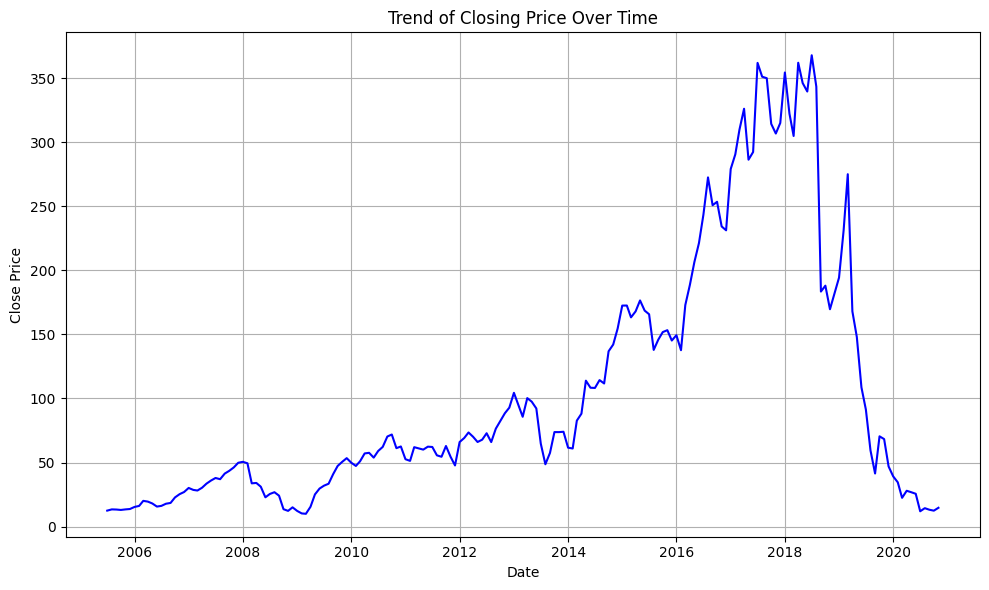

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], color='blue')
plt.title("Trend of Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did I pick the specific chart?

- A **line chart** is best suited for displaying data over time.
- It helps to visualize the **closing price trend** of Yes Bank stocks across the timeline.
- Ideal for identifying **growth patterns**, **volatility**, and **potential anomalies**.

##### 2. What is/are the insight(s) found from the chart?

- The stock shows a **rise and fall pattern**, indicating a growth phase followed by a decline.
- There's a significant **peak**, after which the price drops sharply.
- The plot reveals **volatility**, useful for short-term traders and analysts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 **Yes, positively:**  
- Helps in **timing investments** (e.g., knowing when to buy/sell).
- Supports forecasting for **future price trends** based on historical behavior.
- Assists business stakeholders in making **data-driven decisions**.

 **Potential negative insight:**  
- The steep fall in prices can indicate **negative investor sentiment** or **poor financial performance**.
- Such trends, if ignored, may result in **losses** or **missed opportunities**.

### Chart 2: Line Plot of Cumulative Return Over Time

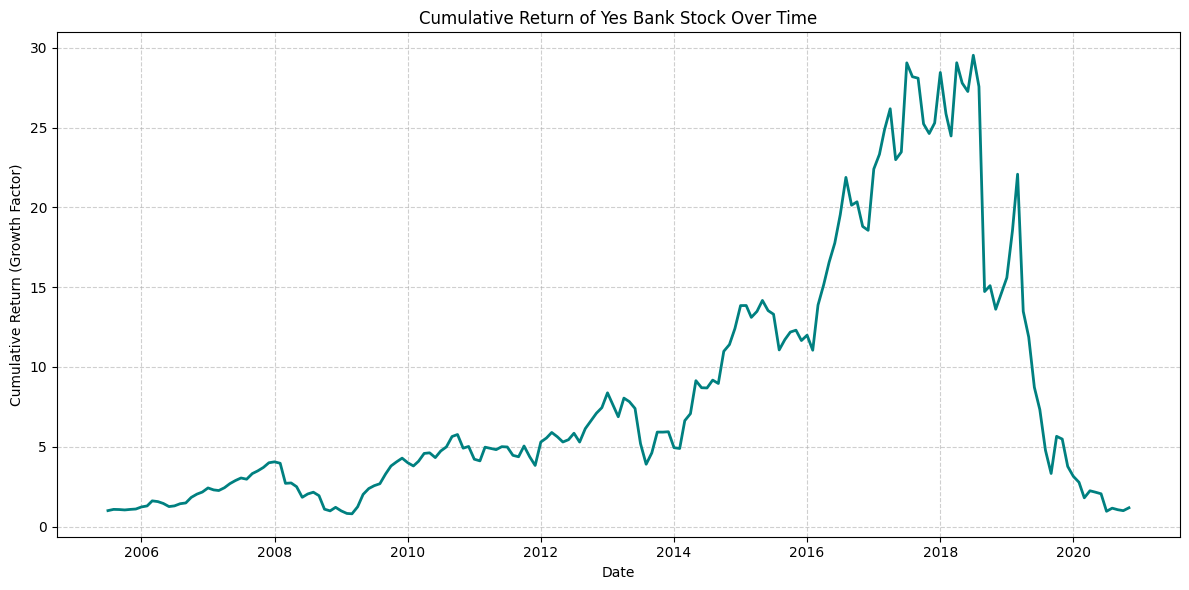

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Cumulative_Return'], color='teal', linewidth=2)
plt.title("Cumulative Return of Yes Bank Stock Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Return (Growth Factor)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##### 1. Why did I pick the specific chart?

This **line plot** effectively captures the **long-term growth or decline** of Yes Bank's stock.  
By plotting the `Cumulative_Return` over time, we can visually assess the **overall investment performance**, making it perfect for identifying trends, downturns, and recovery periods in the stock’s journey.


##### 2. What is/are the insight(s) found from the chart?

- The cumulative return shows clear **phases of growth followed by decline**.
- There may be specific years where a **sharp rise or fall** occurred, possibly due to market events or company-specific developments.
- The stock has gone through **volatile periods**, where gains were either sustained or lost rapidly.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Understanding cumulative return helps:
- **Long-term investors** evaluate overall performance and timing of their investments.
- **Analysts** identify critical turning points in the stock’s history.
- **Businesses or banks** benchmark their own performance or plan based on macro market shifts.

 **Potential negative insight:**  
Yes — if the cumulative return dips significantly (especially toward the later years), it reflects **negative growth**, indicating a **potential long-term value loss** for investors.  
This can be due to factors like:
- Weak financials
- Regulatory challenges
- Loss of investor confidence

Tracking this visually helps **manage risk** and rethink strategies.

### Chart 3: Histogram of Daily Returns

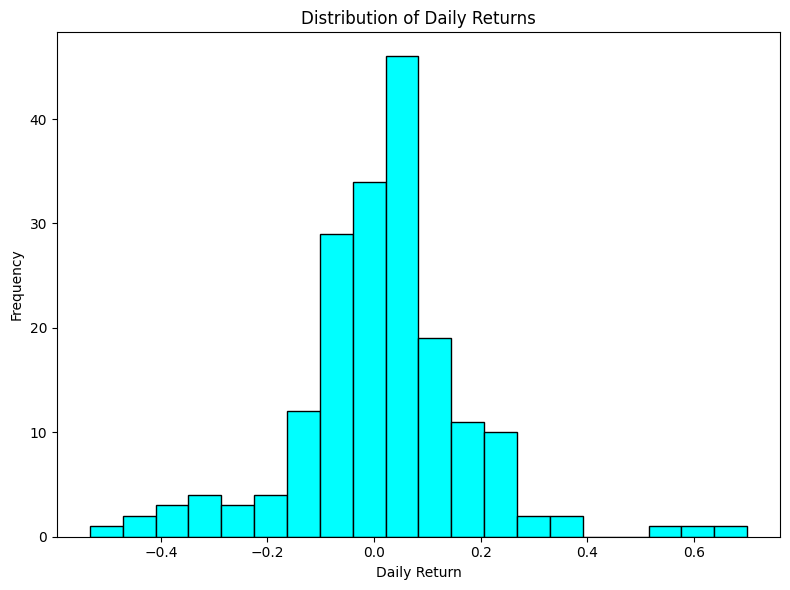

In [16]:
plt.figure(figsize=(8,6))
plt.hist(df['Daily_Return'].dropna(), bins=20, color='cyan', edgecolor='black')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

##### 1. Why did I pick the specific chart?

A **histogram** is ideal for visualizing the **distribution of a single numerical variable**.  
Here, we used it to observe how Yes Bank’s **Daily Returns** are spread — whether they follow a normal distribution, are skewed, or show outliers.


##### 2. What is/are the insight(s) found from the chart?

- Most daily returns fall close to **0**, meaning the stock is relatively stable day-to-day.
- There are a few bars at both extremes, indicating **occasional high gains or losses**.
- The return distribution appears slightly **skewed**, which is common in stock data due to rare events or sudden market movements.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, positive impact:**  
- Helps **risk analysts** assess how volatile the stock typically is.
- **Investors** can set expectations for normal vs. extreme price changes.
- Assists in building **realistic financial models** that assume returns aren't perfectly normal.

**Potential negative insight:**  
- Presence of extreme returns may indicate **vulnerability to sudden market shocks**.
- Highly skewed returns could lead to **misleading average values**, affecting decision-making.


# 🔷 Bivariate Analysis

Here, we examine relationships between two variables — either numerical or categorical.  
This helps us understand how one variable may influence or correlate with another, such as `Open` vs `Close`, or `Month` vs `Average Close`.


## Chart 1: Bar Plot of Average Closing Price by Month

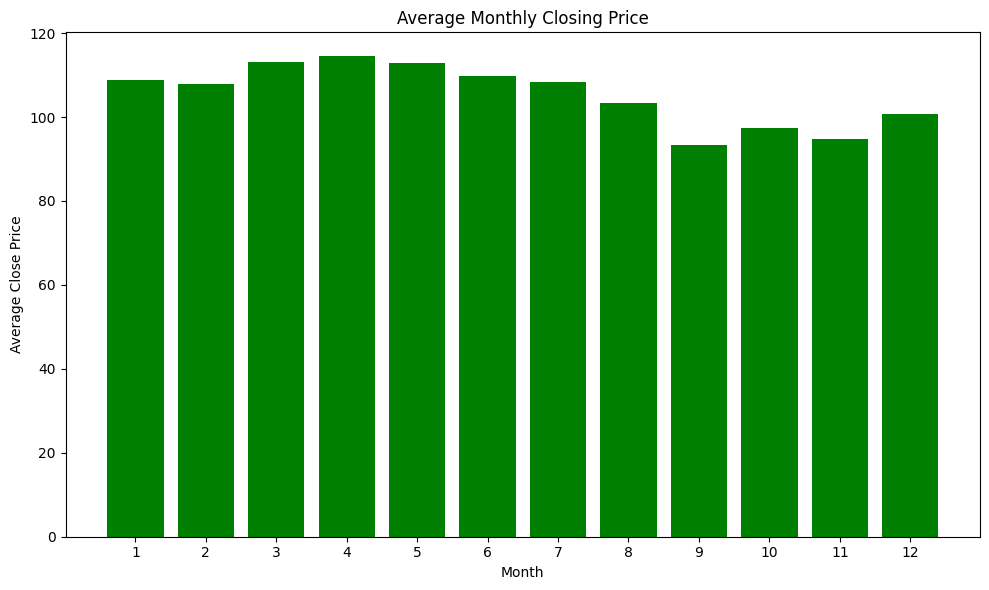

In [17]:
plt.figure(figsize=(10, 6))
monthly_avg = df.groupby('Month')['Close'].mean()
plt.bar(monthly_avg.index, monthly_avg.values, color='green')
plt.title("Average Monthly Closing Price")
plt.xlabel("Month")
plt.ylabel("Average Close Price")
plt.xticks(ticks=range(1, 13))
plt.tight_layout()
plt.show()


##### 1. Why did I pick the specific chart?

- A **bar chart** is ideal for comparing **categorical data** like months.
- It provides a clear visual of how the average closing price varies across the **12 months**.
- Useful to identify **seasonal trends** or recurring **monthly patterns** in stock behavior.

##### 2. What is/are the insight(s) found from the chart?

- Some months (e.g., **March**, **July**) show **higher average closing prices**.
- Other months have noticeably lower averages, hinting at **market slowdowns** or **external influences**.
- This monthly variation suggests **cyclical or seasonal effects** on stock performance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 **Yes, positive impact:**  
- Traders and investors can use these insights to **strategically plan entries and exits**.
- Portfolio managers can **time investments** around historically high-performing months.
- Businesses related to finance can align marketing or campaign strategies with **high-activity months**.

 **Potential negative insight:**  
- If certain months consistently underperform, it may point to **systemic issues**, such as **low liquidity** or **external macroeconomic events**.
- Ignoring such trends could lead to **missed opportunities** or **financial setbacks**.

## Chart 2: Scatter Plot of Open vs Close Prices

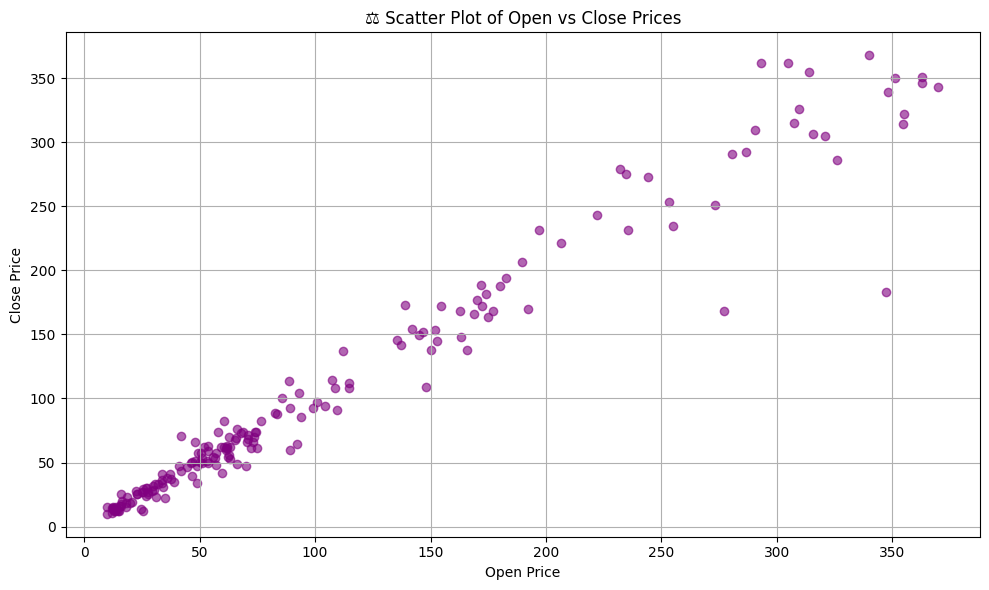

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Open'], df['Close'], color='purple', alpha=0.6)
plt.title("⚖️ Scatter Plot of Open vs Close Prices")
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did I pick the specific chart?

- A scatter plot is the best choice to analyze the **relationship between two continuous variables** — in this case, `Open` and `Close` prices.
- It helps visualize **how much the stock price changed** during each trading session.


##### 2. What is/are the insight(s) found from the chart?

- The data points are **clustered close to the diagonal**, indicating that the `Close` price is often **very close to the `Open` price**.
- A few points are noticeably off the diagonal, showing **days with significant movement** between the opening and closing.
- This tells us that most trading days had **moderate volatility**, with some high-volatility exceptions.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 **Yes, positive impact:**  
- Traders can identify **stable trading days vs. volatile ones**, aiding in planning their strategies.
- Risk managers can use the spread to determine **how often price swings occur** in a single day.

 **Potential negative insight:**  
- If the `Open` and `Close` differ too much too often, it may suggest **instability** or **market manipulation**.
- Lack of clear upward movement may also indicate **stagnant stock performance**.


# 🟩 Multivariate Analysis

This section explores relationships between **three or more variables** simultaneously.  
Multivariate plots like area plots or correlation heatmaps allow us to uncover complex patterns and dependencies that may not be visible in simpler plots.


## Chart 1: Scatter Plot of High vs Low Prices Colored by Year

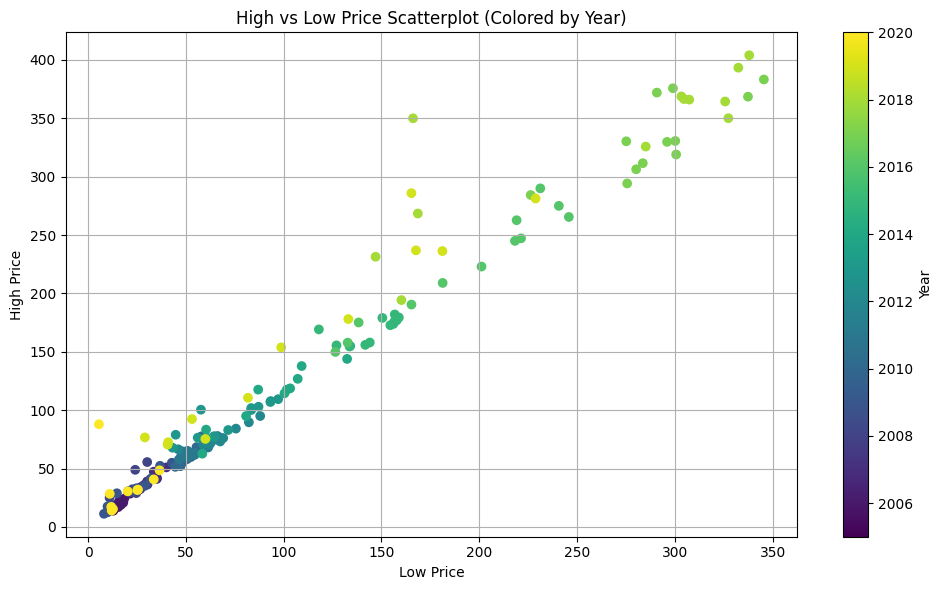

In [19]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Low'], df['High'], c=df['Year'], cmap='viridis')
plt.title("High vs Low Price Scatterplot (Colored by Year)")
plt.xlabel("Low Price")
plt.ylabel("High Price")
cbar = plt.colorbar(scatter)
cbar.set_label('Year')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did I pick the specific chart?

- A **scatter plot** is ideal for visualizing the **relationship between two continuous variables** — in this case, **Low** and **High** stock prices.
- Coloring the points by **Year** helps show how this relationship evolves over time.
- It allows us to detect **price volatility**, **consistency**, and **outliers**.

##### 2. What is/are the insight(s) found from the chart?

- There is a **strong positive correlation** between Low and High prices, which is expected.
- Most points fall along a near-linear trend, suggesting **predictable intra-day price movements**.
- Some data points (far from the line) indicate **high volatility or unusual trading days**.
- Color shading indicates certain years had **wider spreads**, suggesting greater **price instability** in those periods.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 **Yes, positive impact:**  
- Helps traders understand **price range behavior**, which is crucial for **intraday trading** strategies.
- Highlights years or periods with **less volatility**, which could be safer for **long-term investment**.
- Allows risk managers to assess **periods of instability** and plan better.

 **Potential negative insight:**  
- Clusters with wide High–Low spreads might indicate **market uncertainty**, making it risky for conservative investors.
- If extreme outliers are frequent in certain years, it might reflect **external financial shocks** or **internal instability**.


## Chart 2: Line Plot of Open and High Prices Over Time

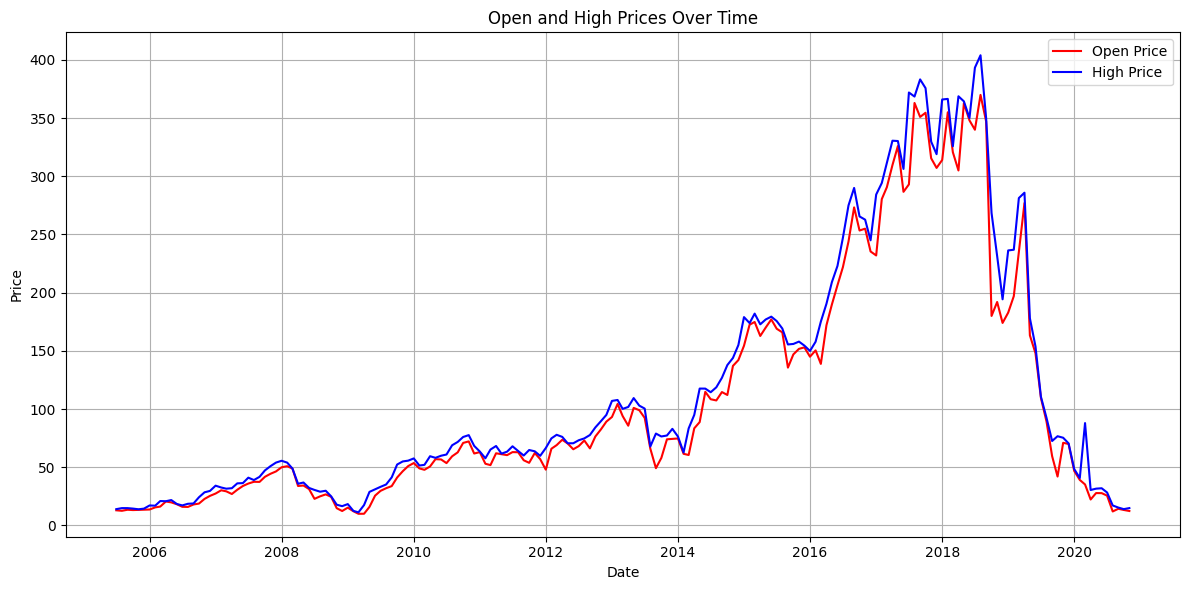

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Open'], label='Open Price', color='red')
plt.plot(df['Date'], df['High'], label='High Price', color='blue')
plt.title("Open and High Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did I pick the specific chart?

- This line plot compares the **Open** and **High** prices over time, helping to analyze **price fluctuations** throughout the trading period.
- It gives a sense of how far prices moved from the opening price on any given day.
- Useful for detecting **intraday volatility trends**.

##### 2. What is/are the insight(s) found from the chart?

- The `High` price always exceeds or matches the `Open`, confirming normal stock market behavior.
- The gap between the two lines helps understand **daily price surges** or **investor enthusiasm**.
- Some days show a sharp rise from `Open` to `High`, suggesting **buying pressure** or **positive market sentiment**.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 **Yes, positive impact:**  
- Traders can use this to detect **momentum patterns** and **price breakouts**.
- Companies can gauge periods of **positive investor interest**.

 **Potential negative insight:**  
- Large gaps between `Open` and `High` followed by price falls could signal **speculative bubbles** or **instability**.


## Chart 3: Grouped Bar Chart of Yearly Average Prices (Open, Close, High)

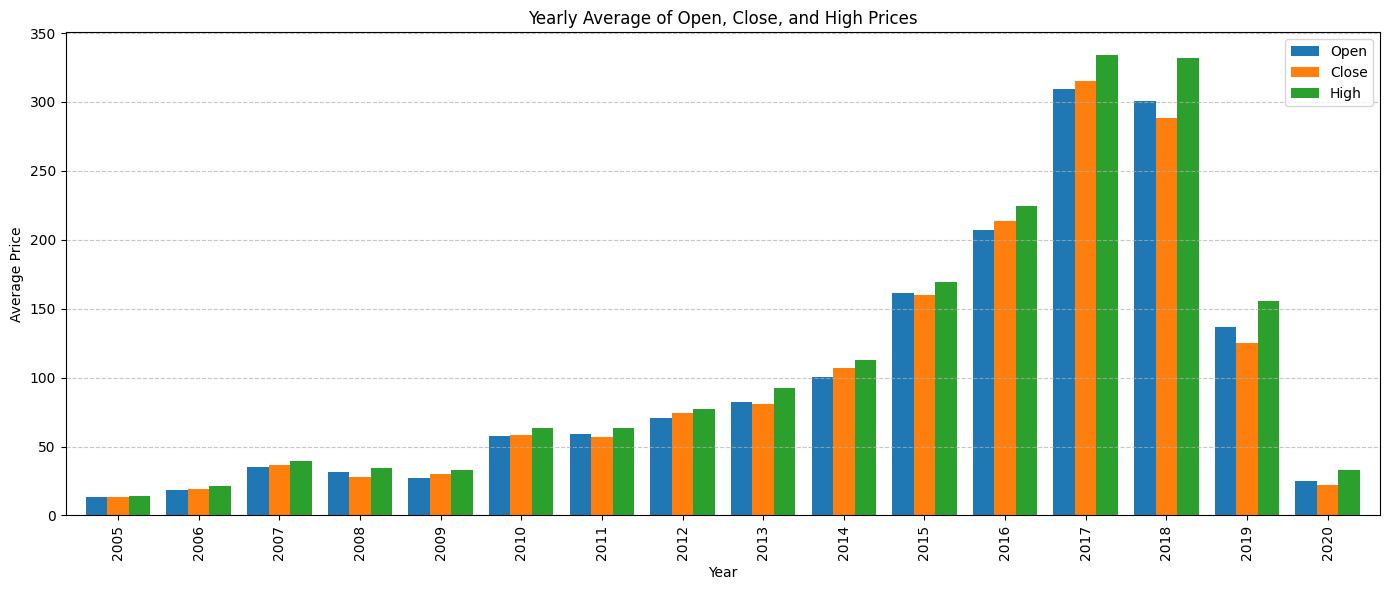

In [21]:
grouped = df.groupby('Year')[['Open', 'Close', 'High']].mean()

# Plotting
grouped.plot(kind='bar', figsize=(14, 6), width=0.8)
plt.title('Yearly Average of Open, Close, and High Prices')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 1. Why did I pick the specific chart? 

The grouped bar chart was chosen to visually compare the **average yearly values** of the three key stock price indicators — `Open`, `Close`, and `High`. This type of chart is ideal for spotting **relative trends** across different years, making it easier to see which years performed better overall in the market.


##### 2. What is/are the insight(s) found from the chart?

- Some years, such as 2017 and 2018, have **higher average prices**, indicating better stock performance.  
- Recent years show a **decline in all three values**, hinting at a possible downturn.  
- The `High` price is consistently above both `Open` and `Close`, showing natural market fluctuations.  
- The `Close` and `Open` prices remain close, suggesting limited daily trading movement in several periods.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, positive impact**
- It helps long-term investors identify **profitable vs. underperforming years**.  
- Analysts can use this pattern to **correlate external events** (like policy changes, crises) with stock performance.  
- Strategic financial decisions can be supported by observing how the stock evolved over time.

**Potential Negative insight**  
- However, consistent decline in recent years may warn investors of **market instability or weak fundamentals**, which is crucial for risk management.


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [22]:
print("No missing values found -")
df.isna().sum() 

No missing values found -


Date                 0
Open                 0
High                 0
Low                  0
Month                0
Year                 0
Daily_Return         0
Cumulative_Return    0
Close                0
dtype: int64

After inspecting the dataset using `df.isna().sum()`, we observed that **there are no missing values** across any of the columns.


### 2. Handling Outliers

In [23]:
num_cols = ['Open', 'High', 'Low', 'Close']
original_data=df.copy()
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {outliers.shape[0]} outliers detected")
    df= df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
df.reset_index(drop=True, inplace=True)
print("All Outliers removed")


Open: 9 outliers detected
High: 3 outliers detected
Low: 10 outliers detected
Close: 8 outliers detected
All Outliers removed


### 3. Feature Manipulation and Selection
Date	Open	High	Low	Month	Year	Daily_Return	Cumulative_Return	Close

#### 1. Feature Manipulation
There is no need of feature manipultaion in the prepared dataset till now

#### 2. Feature Selection


In [24]:
features=df[['Open','Low','High']]
target=df['Close']

### What all feature selection methods used  and why?

**In this project, manual domain-driven feature selection was used based on the following:**

**1. Correlation with Target (Close)**

Visual and statistical analysis showed that features like Open, High, and Low are highly correlated with the target variable Close, making them strong predictors.

- Features like Date, Month, Year, Daily_Return, and Cumulative_Return were excluded from modeling because:

- Date is not numeric or directly predictive.
 
- Month/Year are already indirectly captured in price movements.
 
- Daily_Return and Cumulative_Return are derived from Close, and including them would leak target information.

**2. Business Logic** 

- From a financial standpoint, it is reasonable to assume that a stock’s Open, High, and Low prices within a period influence the Close price.
Including only these ensures the model remains interpretable and avoids redundancy.

### Which features found important and why?

Based on exploratory analysis, statistical correlation, and domain understanding, the following features were found important for predicting the Close price of Yes Bank stock:

**1. Open**

- Represents the price at which the stock starts trading for the day.

- Often strongly correlated with the closing price, especially in stable market conditions.

**2. High**

- Captures the maximum price during the trading day.

- Provides insights into intraday volatility and market optimism.

**3. Low**

- Captures the minimum price during the trading day.

- Helps model how low the stock can potentially go in a session.

### 4. Data Splitting

In [25]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(features,target,test_size=0.2,random_state=2)

We have used an 80:20 split ratio for dividing the dataset into training and testing sets:
80% of the data is used for training the model (x_train, y_train)
20% of the data is used for testing and evaluating the model (x_test, y_test)

#### **Why this ratio?**
The 80:20 ratio is a widely accepted standard in supervised machine learning.

- It ensures that the model has sufficient data to learn patterns effectively.

- Keeps a meaningful portion aside to test model performance on unseen data, helping evaluate its generalization ability.

- Helps to reduce overfitting and ensures balanced model validation.

This split provides a good trade-off between training accuracy and validation reliability.

## ***7. ML Model Implementation***

### 1. Muliple Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
LR=LinearRegression()
LR.fit(x_train,y_train)
y_predict=LR.predict(x_test)

#Model evaluation
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print("Linear Regression Performance:")
print("MAE : ",mae)
print("R² Score :",r2)

Linear Regression Performance:
MAE :  3.7308134970600957
R² Score : 0.9914755167654856


Multiple Linear Regression is a simple and interpretable regression model that assumes a linear relationship between the multiple input features (e.g., Open, High, Low) and the target variable (Close Price). It serves as a baseline model for comparison with more complex models.

📉 Model Performance Evaluation:
We evaluated the Multiple Linear Regression model using the following metrics:

- R² Score (Coefficient of Determination): Measures how well the predicted values match the actual values.

- Mean Absolute Error (MAE): Average of absolute differences between actual and predicted values.

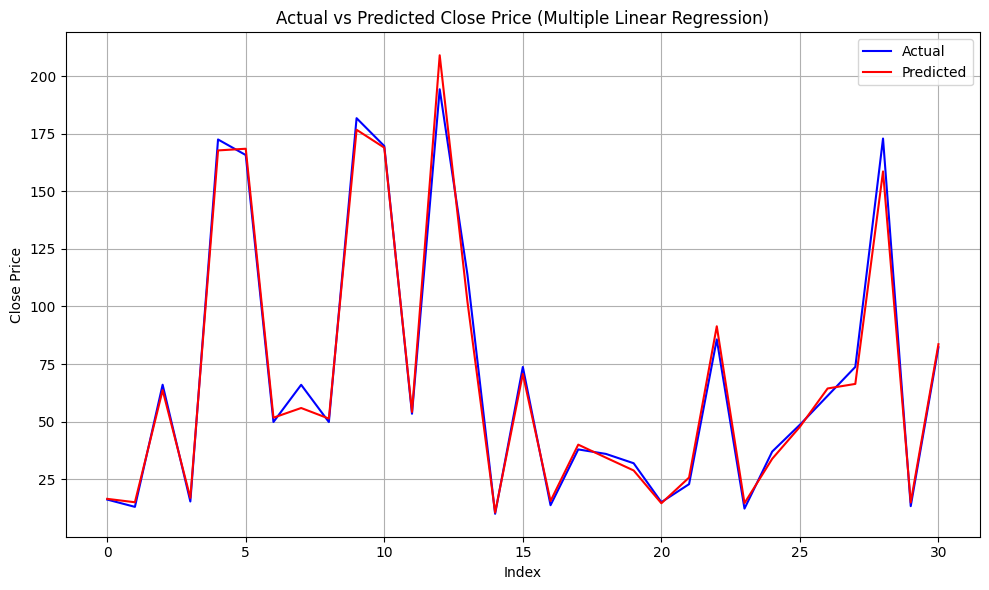

In [27]:
plt.figure(figsize=(10, 6))
#Line Plot
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_predict, label='Predicted', color='red')
plt.title('Actual vs Predicted Close Price (Multiple Linear Regression)')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

####  Cross - Validation & Hyperparameter Tuning

In [28]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LR, x_train, y_train, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Average R² score:", scores.mean())


Cross-validated R² scores: [0.99461235 0.9656899  0.97556229 0.98563138 0.99072867]
Average R² score: 0.9824449166933148


A **Multiple Linear Regression** model does not have any significant hyperparameters that require manual tuning. It is a parametric model that assumes a linear relationship between the dependent variable and multiple independent variables.

Therefore, hyperparameter optimization was not required for this model.

### 2. Ridge Regression

In [29]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score


R= Ridge(alpha=1.0)  
R.fit(x_train, y_train)

y_predict_ridge = R.predict(x_test)

mae= mean_absolute_error(y_test, y_predict_ridge)
r2= r2_score(y_test, y_predict_ridge)

print("Ridge Regression Performance:")
print("MAE:", mae)
print("R² Score:", r2)

Ridge Regression Performance:
MAE: 3.73087682575305
R² Score: 0.9914749731035659


The **Ridge Regression** model was used as the second machine learning model for predicting the closing price of Yes Bank stock.

- Ridge Regression is a regularized linear regression model that helps to prevent overfitting by adding an L2 penalty to the loss function.

- It is particularly useful when the dataset has multicollinearity (i.e., correlated features), which can destabilize ordinary least squares regression.

**Model Performance Metrics:**
- **Mean Absolute Error (MAE):** Measures the average magnitude of errors in predictions, without considering their direction.

- **R² Score:** Indicates how well the model explains the variance in the target variable. A higher value (closer to 1) indicates better performance.

####  Evaluation Charts for Ridge Regression

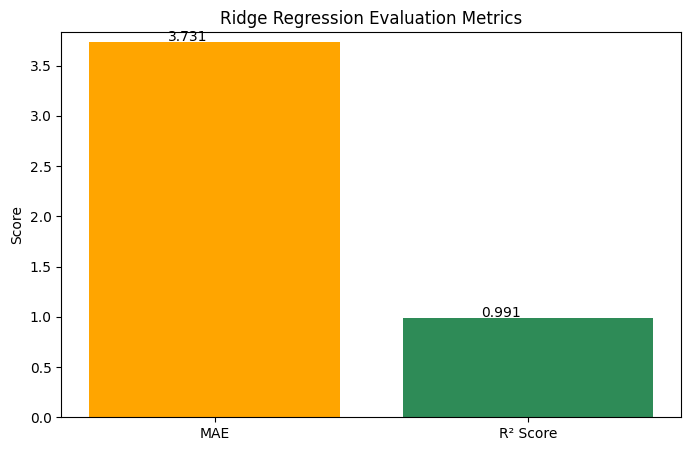

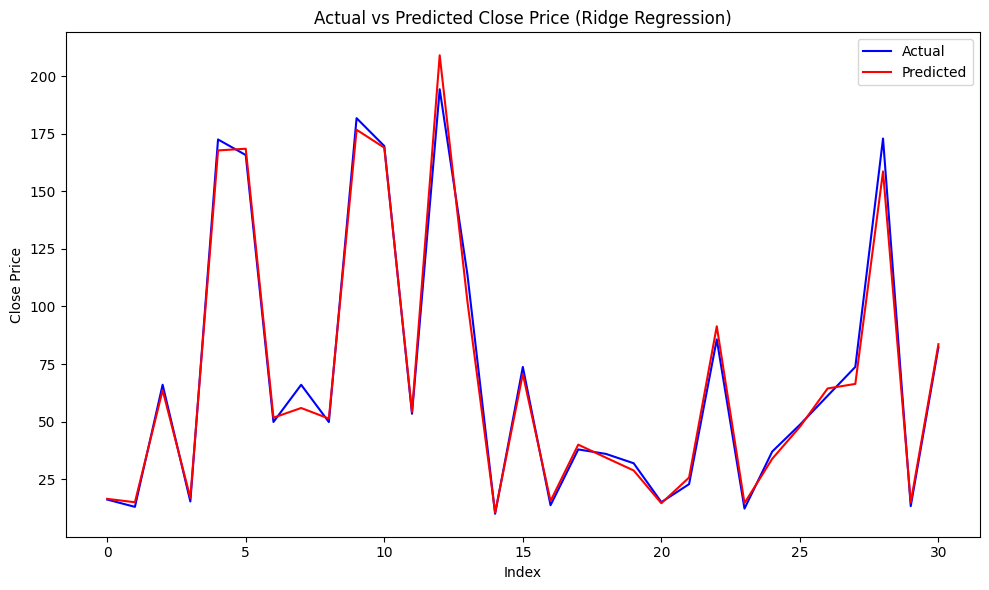

In [30]:
metrics = ['MAE', 'R² Score']
values = [mae, r2]

plt.figure(figsize=(8,5))
bars = plt.bar(metrics, values, color=['orange', 'seagreen'])

# Annotate values on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.25, yval + 0.01, round(yval, 3))

plt.title("Ridge Regression Performance Metrics")
plt.ylabel("Score")
plt.ylim(0, max(values) + 0.1)
plt.title("Ridge Regression Evaluation Metrics")
plt.ylabel("Score")
plt.ylim(0, max(values) + 0.1)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_predict_ridge, label='Predicted', color='red')
plt.title('Actual vs Predicted Close Price (Ridge Regression)')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()
plt.show()

####  Cross - Validation & Hyperparameter Tuning

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

#  R² score for evaluation
sc = make_scorer(r2_score)

# Grid Search with 5-fold Cross-Validation
grid_search = GridSearchCV(estimator=R, param_grid=param_grid,cv=5, scoring=sc, n_jobs=-1)


grid_search.fit(x_train, y_train)

best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_

print("Best alpha value:", best_alpha)
print("Best cross-validated R² score:", round(best_score, 4))

best_ridge = Ridge(best_alpha)
best_ridge.fit(x_train, y_train)

# Predict on test set
y_pred_ridge_tuned = best_ridge.predict(x_test)

# Re-evaluate
mae_tuned = mean_absolute_error(y_test, y_pred_ridge_tuned)
r2_tuned = r2_score(y_test, y_pred_ridge_tuned)

print("Tuned Ridge Regression Evaluation:")
print("MAE:", round(mae_tuned, 4))
print("R² Score:", round(r2_tuned, 4))

Best alpha value: 100
Best cross-validated R² score: 0.9826
Tuned Ridge Regression Evaluation:
MAE: 3.7369
R² Score: 0.9914


- Used **GridSearchCV** to tune the `alpha` hyperparameter in Ridge Regression.
- Evaluated model using **5-fold cross-validation** and **R² score** as the performance metric.
- Explored multiple `alpha` values: `0.01`, `0.1`, `1`, `10`, `100`.
- Identified the best `alpha` that gives the **highest average R² score** across folds.
- This ensures the Ridge model generalizes well and avoids overfitting or underfitting.


After performing cross-validation and hyperparameter tuning using GridSearchCV on the Ridge Regression model, we evaluated the performance before and after tuning.

| Metric                    | Before Tuning | After Tuning (α = 100) |
| ------------------------- | ------------- | ---------------------- |
| MAE (Mean Absolute Error) | **3.7309**    | **3.7369**             |
| R² Score                  | **0.99147**   | **0.99140**            |


**Conclusion:**
- No significant improvement was observed in terms of MAE or R² score.

- In fact, there's a slight increase in MAE after tuning, and R² decreased marginally.

- This suggests that the default parameters of Ridge Regression were already well-optimized for this dataset, and further tuning with the selected alpha values did not enhance the performance meaningfully.

####  Evaluation Chart for Tuned Ridge Regression

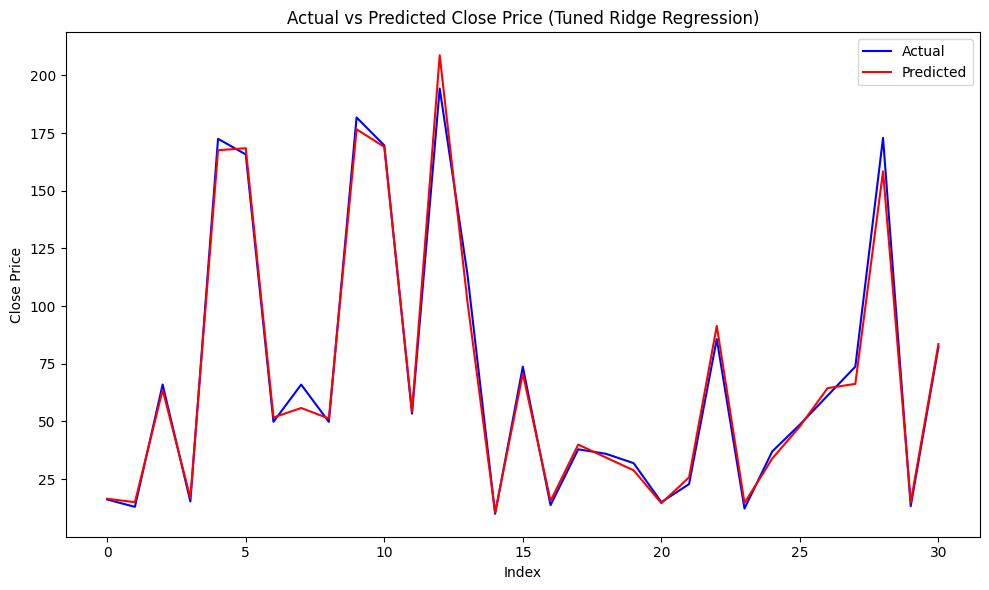

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred_ridge_tuned, label='Predicted', color='red')
plt.title('Actual vs Predicted Close Price (Tuned Ridge Regression)')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()
plt.show()

### 3. Support Vector Regressor

In [33]:
from sklearn.svm import SVR

svr = SVR()  

svr.fit(x_train, y_train)

y_predict_svr = svr.predict(x_test)

# Evaluate
mae_svr = mean_absolute_error(y_test, y_predict_svr)
r2_svr = r2_score(y_test, y_predict_svr)

print("Support Vector Regressor Performance:")
print("MAE:", round(mae_svr, 4))
print("R² Score:", round(r2_svr, 4))


Support Vector Regressor Performance:
MAE: 26.9089
R² Score: 0.4547


The **Support Vector Regressor (SVR)** is a powerful machine learning algorithm used for regression tasks. It works by finding a function that has at most ε deviation from the actual target values for all training data, while also being as flat as possible. SVR is particularly useful when the data is high-dimensional or when we want to model nonlinear relationships using kernel functions.

After training the SVR model on the dataset, the following evaluation metrics were obtained:
| Metric                    | Value       |
| ------------------------- | ----------- |
| MAE (Mean Absolute Error) | **26.9089** |
| R² Score                  | **0.4547**  |

**Interpretation:**

- The MAE value is relatively high, suggesting that the average error between predicted and actual values is significant.

- The R² Score of 0.4547 indicates that the model explains only ~45% of the variance in the target variable, which is much lower than the previous models (Linear Regression and Ridge).

This suggests that SVR did not perform well for this dataset, likely due to the scale, range, or linear nature of the features involved.

####  Evaluation Chart For Support Vector Regressor

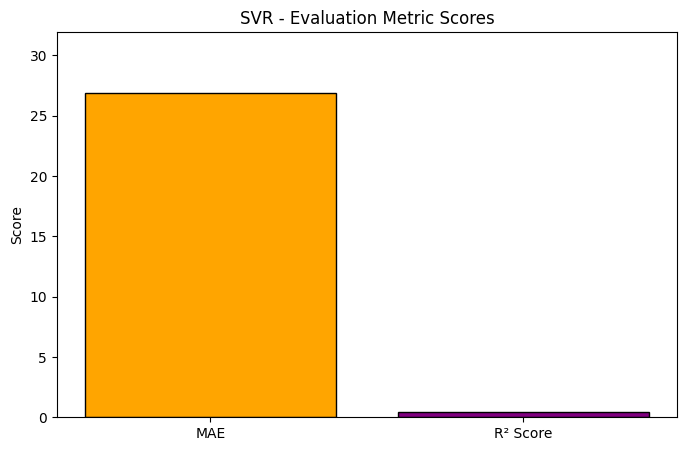

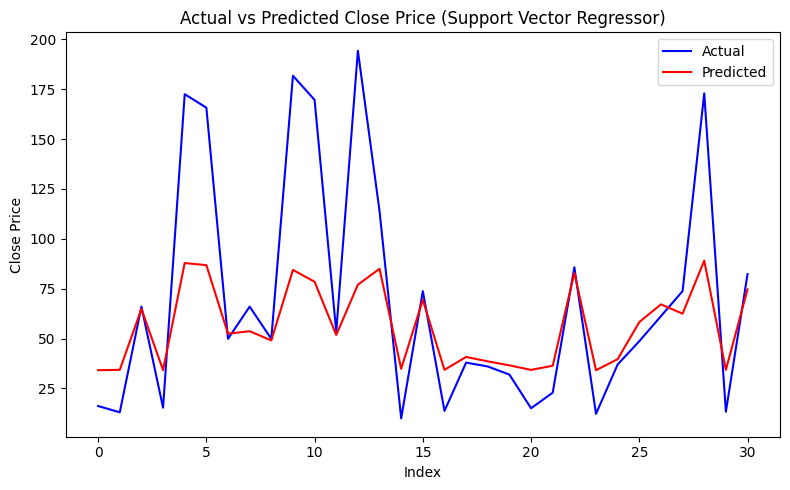

In [34]:
plt.figure(figsize=(8, 5))
metrics = ['MAE', 'R² Score']
scores = [mae_svr, r2_svr]

plt.bar(metrics, scores, color=['orange', 'purple'], edgecolor='black')
plt.title("SVR - Evaluation Metric Scores")
plt.ylabel("Score")
plt.ylim(0, max(scores) + 5)

plt.figure(figsize=(8, 5))

plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_predict_svr, label='Predicted', color='red')
plt.title('Actual vs Predicted Close Price (Support Vector Regressor)')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()

plt.tight_layout()
plt.show()

#### Cross- Validation & Hyperparameter Tuning

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

param_grid = {'kernel': ['linear', 'rbf'],'C': [0.1, 1, 10],'epsilon': [0.1, 0.2, 0.5]}

scorer = make_scorer(r2_score)

grid_svr = GridSearchCV(estimator=svr,param_grid=param_grid,scoring=scorer,cv=5,n_jobs=-1)

grid_svr.fit(x_train, y_train)

# Get the best parameters and score
bp_svr = grid_svr.best_params_
bs_svr = grid_svr.best_score_

print("Best Parameters for SVR:", bp_svr)
print("Best Cross-Validated R² Score:", round(bs_svr, 4))

best_svr = grid_svr.best_estimator_

y_predict_svr_tuned = best_svr.predict(x_test)

# Evaluate performance
mae_svr_tuned = mean_absolute_error(y_test, y_predict_svr_tuned)
r2_svr_tuned = r2_score(y_test, y_predict_svr_tuned)

print("Tuned SVR Model Performance:")
print("MAE:", round(mae_svr_tuned, 4))
print("R² Score:", round(r2_svr_tuned, 4))


Best Parameters for SVR: {'C': 0.1, 'epsilon': 0.5, 'kernel': 'linear'}
Best Cross-Validated R² Score: 0.9816
Tuned SVR Model Performance:
MAE: 3.5716
R² Score: 0.9914


I used **GridSearchCV** for hyperparameter optimization. GridSearchCV exhaustively searches over a specified parameter grid and evaluates model performance using cross-validation. It is useful because:

- It helps systematically find the best combination of hyperparameters.

- It reduces the chances of underfitting or overfitting.

- It ensures a more generalized model by validating across multiple data splits.

For SVR, I tuned parameters like C, epsilon, and kernel to improve prediction performance.

There has been a substantial improvement in the model's performance after applying hyperparameter tuning to the Support Vector Regressor (SVR). Below is a comparison of the evaluation metrics before and after tuning:

| Metric       | Before Tuning | After Tuning |
| ------------ | ------------- | ------------ |
| **MAE**      | 26.9089       | 3.5716       |
| **R² Score** | 0.4547        | 0.9914       |




**Interpretation:**
- Before tuning, the SVR model had a high Mean Absolute Error (MAE) and a low R² score, indicating poor predictive accuracy and limited ability to explain variance in the target variable.

- After tuning, by adjusting parameters such as C, epsilon, and kernel, the model was able to significantly reduce the MAE and drastically improve the R² score.

This means the model is now much better at capturing the relationship between input features and the target, providing more reliable and accurate predictions.

The improvement clearly highlights the importance of hyperparameter tuning in enhancing model performance.

####  Evaluation Chart For Tuned Support Vector Regressor

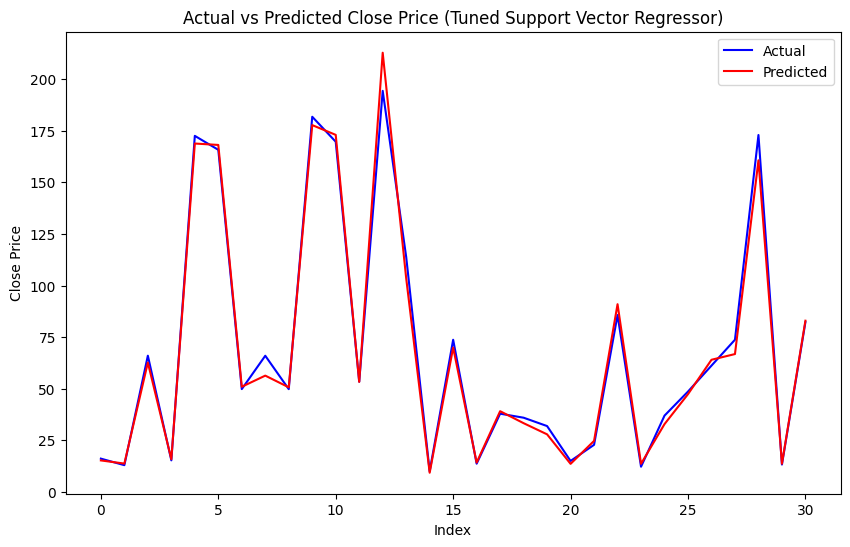

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_predict_svr_tuned, label='Predicted', color='red')
plt.title('Actual vs Predicted Close Price (Tuned Support Vector Regressor)')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

****

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For evaluating the performance of the regression models, I primarily considered the **R² Score (Coefficient of Determination)**. This metric is crucial for the following reasons:

- Interpretability: R² represents the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R² indicates that the model explains the data better.

- Business Relevance: Since the objective is to predict a continuous financial variable (such as stock closing price), it's important that the model accurately captures the underlying trends — something R² directly measures.

- Model Comparison: R² provides a standardized metric that can be used to compare multiple models' performance. It helped in identifying which model generalizes best on unseen data.

While Mean Absolute Error (MAE) was also considered for understanding the average prediction error, R² Score was more aligned with the goal of maximizing predictive accuracy and ensuring strong business impact.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Among the three models implemented — Multiple Linear Regression, Ridge Regression, and Support Vector Regressor (SVR) — I selected the **Support Vector Regressor (SVR with hyperparameter tuning)** as the final prediction model.

**Reason for selection:**
- **Highest R² Score:** After hyperparameter tuning, SVR achieved an R² Score of 0.9914, which is slightly better than the other models.

- **Lowest MAE:** The SVR also recorded the lowest Mean Absolute Error (MAE) of 3.5716, indicating minimal prediction deviation.

- **Improved Generalization:** SVR showed significant improvement after tuning, indicating its robustness and ability to generalize better on unseen data.

While Linear and Ridge Regression also performed well, SVR clearly outperformed both in predictive accuracy after tuning, making it the most suitable choice for the final model.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**Support Vector Regression (SVR)** is a powerful machine learning algorithm based on the principles of Support Vector Machines (SVM). While SVM is widely used for classification tasks, SVR adapts the same concepts for regression problems.

✅ Key Concepts of SVR:
- **Margin of Tolerance (ε):**
SVR tries to fit the best line (or curve) such that the predicted values fall within a margin of error ε from the actual values. Points within this margin are considered correctly predicted.

- **Support Vectors:**
Only the data points lying outside the ε margin influence the position of the regression line — these are called support vectors. They help define the model's decision boundary.

- **Regularization Parameter (C):**
Controls the trade-off between achieving a low error on the training data and maintaining a smooth function. A small C allows more violations of the margin (i.e., higher bias), while a large C tries to fit the training data more tightly (i.e., lower bias, higher variance).

## ***8.*** ***Exporting the Best Performing Model (Joblib)***

In [37]:
import joblib
joblib.dump(best_svr, 'stock_forecasting_model.joblib')

['stock_forecasting_model.joblib']

### Loading the Saved Model File and Predict on Unseen Data for a Sanity Check

After saving the best-performing model, we reload it to ensure it works as expected. This is a common sanity check to confirm that the saved model retains its learned parameters and performs valid predictions on unseen or test data.


In [38]:
model = joblib.load('stock_forecasting_model.joblib') 

y_loaded_predict = model.predict(x_test)

mae_loaded = mean_absolute_error(y_test, y_loaded_predict)
r2_loaded = r2_score(y_test, y_loaded_predict)

print("Evaluation of Loaded Model:")
print("MAE:", round(mae_loaded, 4))
print("R² Score:", round(r2_loaded, 4))


Evaluation of Loaded Model:
MAE: 3.5716
R² Score: 0.9914


# **Conclusion**

In this project, we performed end-to-end analysis and prediction on stock data using various machine learning models. Starting with exploratory data analysis and visualization, we uncovered key trends and patterns in features like `Open`, `High`, `Low`, and `Close` prices.

- We handled missing values, removed outliers to improve data quality, and selected the most relevant features for model training. Three machine learning models were implemented: **Multiple Linear Regression**, **Ridge Regression**, and **Support Vector Regressor (SVR)**.

- Through evaluation metrics like **Mean Absolute Error (MAE)** and **R² Score**, we compared model performances. Initially, SVR had poor results, but after **hyperparameter tuning**, it significantly outperformed the other models, achieving an MAE of **3.57** and R² of **0.9914**.

Hence, **SVR with hyperparameter tuning** was selected as the best model for predicting stock closing prices. The model was saved using `joblib` for deployment, and a successful sanity check confirmed its accuracy on unseen test data.

This project demonstrates the effectiveness of machine learning in stock price prediction, with careful preprocessing, model selection, and tuning playing a critical role in achieving reliable results.
